# The Mnist data



#### Import the libraries

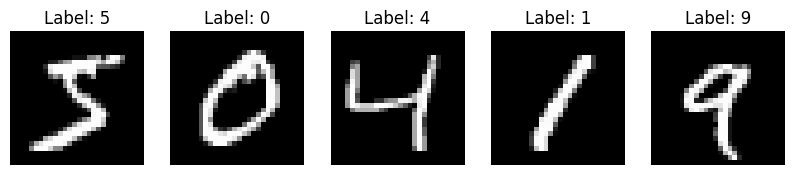

In [8]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report


train, test = tf.keras.datasets.mnist.load_data()

x_train, x_test = np.expand_dims(train[0] / 255.0, -1), np.expand_dims(test[0] / 255.0, -1)
y_train, y_test = train[1], test[1]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## Data split para simular cinco datos aparte.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

folds = skf.split(x_train, y_train)



In [9]:
local_data = [(x_train[tsix], y_train[tsix]) for trix, tsix in folds]

for x in local_data:
    print(len(x[0]))
    print(f"Frecuencia de números: { {int(y):list(x[1]).count(y) for y in set(x[1])} }")
    print(f"Primeros ejemplos (labels): {[int(y) for y in list(x[1])[:15]]}")

12000
Frecuencia de números: {0: 1184, 1: 1348, 2: 1191, 3: 1227, 4: 1169, 5: 1085, 6: 1183, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [5, 2, 8, 0, 4, 3, 7, 5, 6, 5, 3, 9, 4, 6, 1]
12000
Frecuencia de números: {0: 1185, 1: 1349, 2: 1191, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [0, 9, 2, 1, 4, 5, 3, 6, 6, 1, 9, 4, 4, 6, 0]
12000
Frecuencia de números: {0: 1185, 1: 1349, 2: 1192, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1189}
Primeros ejemplos (labels): [4, 1, 9, 2, 3, 8, 7, 6, 7, 3, 0, 7, 4, 4, 5]
12000
Frecuencia de números: {0: 1185, 1: 1348, 2: 1192, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [3, 9, 1, 2, 6, 9, 0, 8, 9, 8, 9, 0, 0, 7, 8]
12000
Frecuencia de números: {0: 1184, 1: 1348, 2: 1192, 3: 1226, 4: 1169, 5: 1084, 6: 1183, 7: 1253, 8: 1171, 9: 1190}
Primeros ejemplos (labels): [1, 3, 1, 7, 4, 0, 1, 3, 8, 9, 0, 1, 7, 9, 2]


In [17]:
# Saving the data
for i, (x, y) in enumerate(local_data):
    np.save(f'../data/x_train_fold_{i}.npy', x)
    np.save(f'../data/y_train_fold_{i}.npy', y)

np.save('../data/x_test.npy', x_test)
np.save('../data/y_test.npy', y_test)




In [7]:
x_train_fold0 = np.load('../data/x_train_fold_0.npy')
y_train_fold0 = np.load('../data/y_train_fold_0.npy')


### Entrenado los modelos